# Learning for varied output sizes

In [1]:
import numpy as np
import torch
import difflib
import matplotlib.pyplot as plt
import matplotlib
from math import *

## load k = 10 data

In [10]:
beh_k_10_all_avg = np.genfromtxt('beh_k_10_all_avg.csv', delimiter=',')
beh_k_10_all_std = np.genfromtxt('beh_k_10_all_std.csv', delimiter=',')

In [12]:
import scipy
import seaborn as sns
sns.set_palette("coolwarm", 10)

%config InlineBackend.figure_format = 'retina'

In [13]:
Ms = np.round(np.linspace(20, 200, 10), 0)

### Compute threshold hidden layer sizes

In [14]:
thres = []
for km_ind in range(0, len(Ms)):
    x = np.log(np.linspace(0, Ms[km_ind], 21)[1:])
    y = np.array(beh_k_10_all_avg[km_ind])[1:]
    f = scipy.interpolate.interp1d(x, y)
    x_new = np.linspace(np.min(x), np.max(x), 100)
    y_new = f(x_new)
    ind = np.where(np.abs(y_new - 0.98) == np.min(np.abs(y_new - 0.98)))[0]
    thres.append([x_new[ind], y_new[ind]])

## Plot

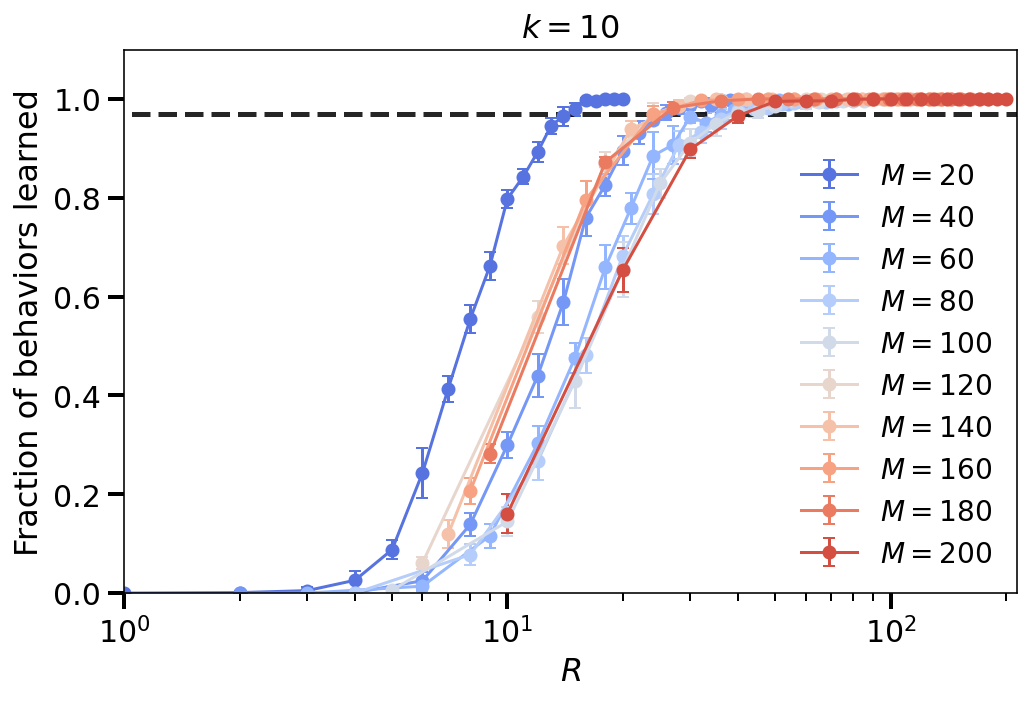

In [15]:
plt.figure(figsize=(8,5))
for km_ind in range(0, len(Ms)):
    plt.errorbar(np.linspace(0, Ms[km_ind], 21)[1:], np.array(beh_k_10_all_avg[km_ind])[1:], 
             yerr = beh_k_10_all_std[km_ind][1:], capsize=3, label = '$M = {}$'.format(int(Ms[km_ind])), 
                 marker ='o')

plt.plot(np.linspace(0, 250, 50), 0.97*np.ones(50), '--', color = 'black', linewidth = 2.5, alpha = 0.85)
plt.xlabel('$ R $', fontsize=16)
plt.ylabel('Fraction of behaviors learned', fontsize=16)
plt.tick_params(labelsize=15)
plt.legend(fontsize=14, frameon=False)
plt.title('$k = 10$', fontsize=16)
plt.xlim([1, 10**2.33])
# plt.xticks([0, 0.5, 1, 1.5, 2], labels = ['$10^0$', '$10^{0.5}$', '$10^{1}$', '$10^{1.5}$', '$10^{2}$'])
plt.ylim([0, 1.1])
plt.xscale('log', basex = 10)
plt.tick_params(axis="y",direction="out")
plt.tick_params(axis="x",direction="out")
plt.tick_params('both', length=8, width=2, which='major')
plt.tick_params('both', length=4, width=1, which='minor')
plt.savefig('k10.pdf')
plt.show()